# 🍮 Gaussian Mixture Models

Here we compare two density estimators we covered so far: KDE (implemented from scratch in the lab) and GMMs.

Recall the multivariate Normal distribution:

$$f(X) = \frac{1}{(2\pi)^{p/2} |\Sigma|^{\frac{1}{2}}} \exp \left[ -\frac{1}{2} (X - \mu)^{\prime} \Sigma^{-1} (X - \mu) \right]$$

For a dataset of $n$ features, this has parameters $μ$ and $Σ$ of size $(n)$ and $(n,n)$ respectively.

$\text{Theorem 1.0}$

Any smooth density can be approximated with any specific nonzero amount of error by a Gaussian mixture model. A Gaussian mixture of size $k$ model is a weighted sum of $k$ normal distribution where the weights satisfy $\Sigma_{i=1}^k w_i = 1$

$$ x\_data \rightarrow P(x) \quad \text{then} \quad P(x) ≈ \sum_{j=1}^{k} w_j N(x, \mu_j, \Sigma_j) \quad \text{for some} \quad  w_j,μ_j,Σ_j$$

Recall that the most optimal classifier in machine learning required a proper and accurate assumption of $P(x)$. We explored before: (i), assuming it's a Gaussian, (ii), assuming it's any specific custom density. However, it given an arbitrary dataset, it was quite hard to make either of these assumptions. Thus, we also explored:

$\text{Kernel Density Estimation}$


1. Choose a bump function $g(x)$ that integrates to $1$
2. Choose a bandwidth $h$ that will control the spread of the bump function
3. Estimate $P(x)$ as follows:
$$P(x) = \frac{1}{M} \sum_{m=1}^{M} \phi(x-x_m)$$
Where
$$ϕ(x)=\frac{1}{h^N}g(\frac{x}{h})$$ 

Which is equivalent to placing the bump function over every single point then averaging them all at the evaluation point.

$\text{Gaussian Mixture Model}$


1. Make $k$ initial guess for $w_j, μ_j, Σ_j$

2. Compute for each point and each Gaussian component
$$γ_{j,m} = P(N=N_j|x=x_m)$$

3. Compute $w_j, μ_j, Σ_j$ using the responsibilities $γ_{j,m}$
$$ μ_j = \frac{\sum_{m=1}^N γ_{j,m} x_m}{\sum_{m=1}^N γ_{j,m}} \quad Σ_j = \frac{\sum_{m=1}^N γ_{j,m} (x_m - μ_j)(x_m - μ_j)^T}{\sum_{m=1}^N γ_{j,m}}
 \quad w_j = \frac{\sum_{m=1}^N γ_{j,m}} {N}
 $$

4. Repeat Until Convergence


5. Return
$$ P(x) ≈ \sum_{j=1}^{k} w_j N(x, \mu_j, \Sigma_j)$$

In [18]:
from sklearn import datasets
import numpy as np
from KDEstimator import KDEstimator, plot_3d, plot_scatter                          # import from the lab
from sklearn.mixture import GaussianMixture

# To align with out interface
class GMM(GaussianMixture):
    def transform(self, X):
        return np.exp(self.score_samples(X))

### ⚡ GMM Much Faster Inference

In [19]:
x_data, _= datasets.make_blobs(n_samples=10000, centers=3, cluster_std=4.0, center_box=(-10,10), random_state=20)

In [20]:
# KDE
kde = KDEstimator(bump='Gauss', bandwidth=2.0).fit(x_data)

# GMM
gmm = GMM(n_components=50, max_iter=1000, random_state=0).fit(x_data)

In [21]:
import timeit

kde_time = timeit.timeit(lambda: kde.transform(x_data), number=1)
gmm_time = timeit.timeit(lambda: gmm.transform(x_data), number=1)
print("Time taken for KDE:", kde_time)
print("Time taken for GMM:", gmm_time)

Time taken for KDE: 2.4731985000000023
Time taken for GMM: 0.018810957999995992


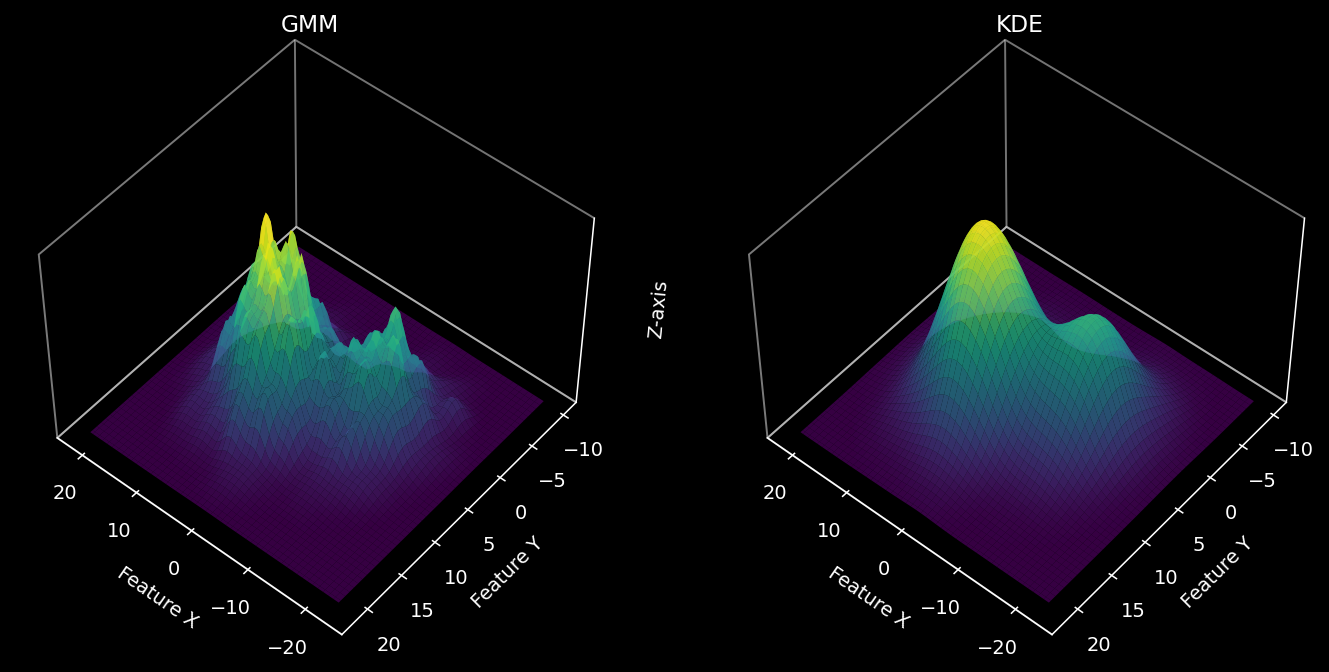

In [22]:
plot_3d(x_data, densities=[gmm, kde], titles=['GMM', 'KDE'])

### ⚡ GMM Much Harder to Tune

Or alternatively no absolute guarantees for optimality

In [23]:
x_data, _= datasets.make_moons(n_samples=1000, noise=0.1, random_state=20)

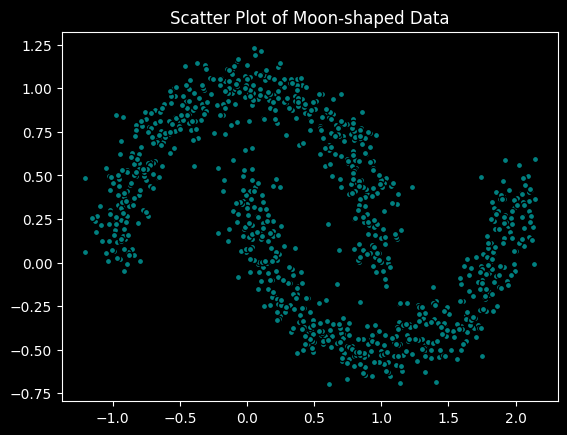

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate the moon-shaped data
x_data, _ = make_moons(n_samples=1000, noise=0.1, random_state=20)

# Scatter plot
plot_scatter(x_data)

In [25]:
# KDE
kde = KDEstimator(bump='Gauss', bandwidth=0.15).fit(x_data)

# GMM
gmm = GMM(n_components=20, n_init=5, max_iter=1000,  random_state=0, init_params="k-means++").fit(x_data)

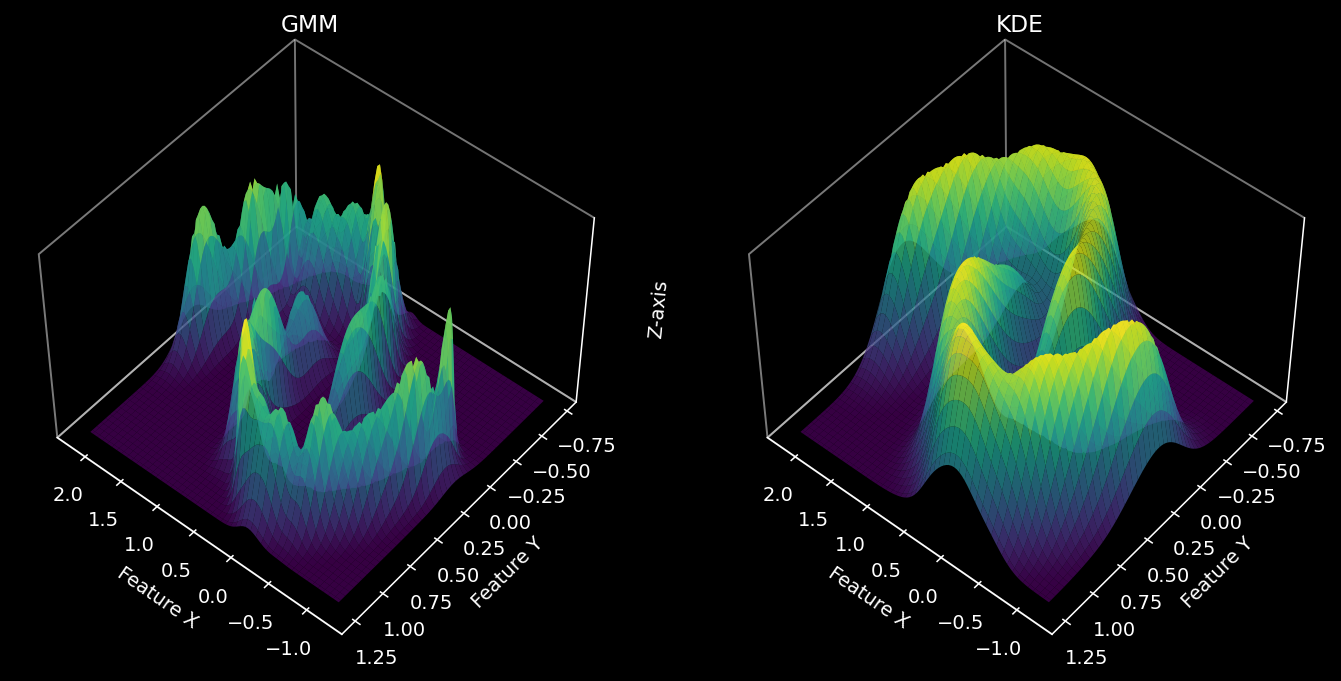

In [26]:
plot_3d(x_data, densities=[gmm, kde], titles=['GMM', 'KDE'])

### 💪 GMM Better Handles Less Data

In [27]:
x_data, _= datasets.make_moons(n_samples=25, noise=0.1, random_state=20)

In [28]:
# KDE
kde = KDEstimator(bump='Gauss', bandwidth=0.15).fit(x_data)

# GMM
gmm = GMM(n_components=4, n_init=5, max_iter=1000, reg_covar=0.01,  random_state=0, init_params="k-means++").fit(x_data)

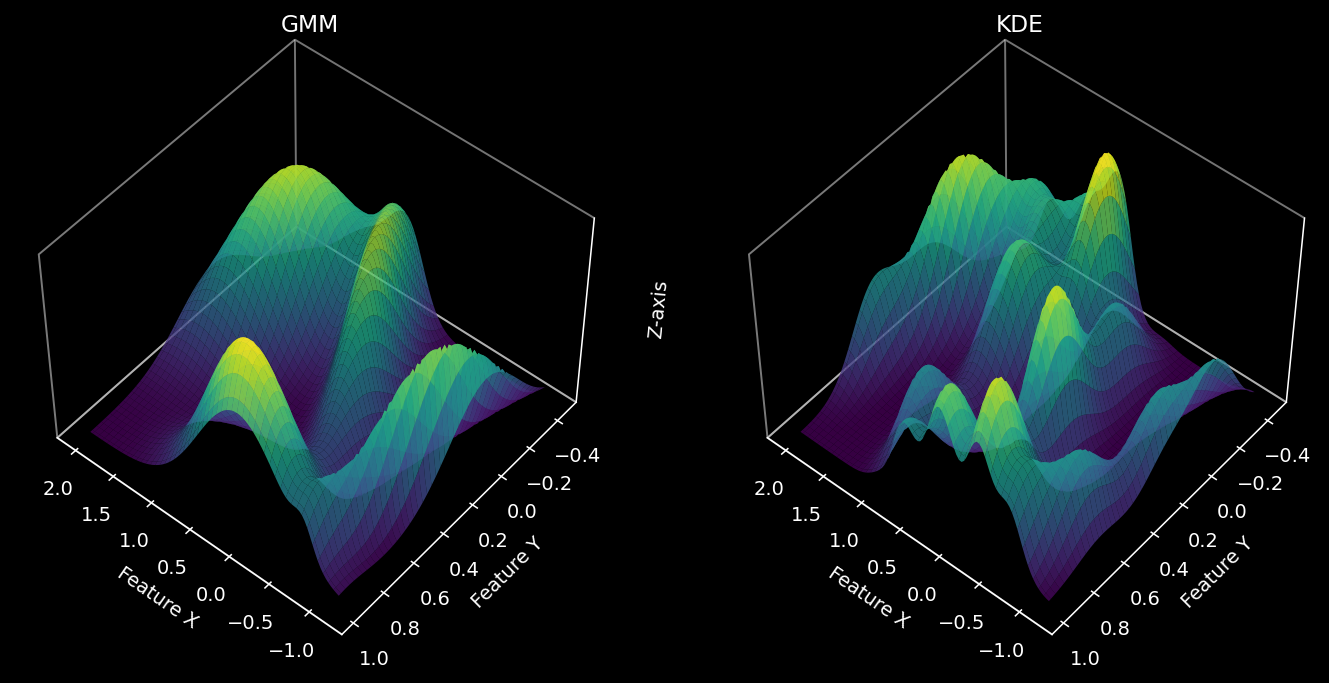

In [29]:
plot_3d(x_data, densities=[gmm, kde], titles=['GMM', 'KDE'])

Takes quite some effort in hyperparameter tuning but still not strongly controlled by the available points similar to KDE. You can try this experiment with other Scikit-learn datasets to learn more.

### 👀 GMM Other Uses

- Can be used to cluster the available data into $k$ clusters (similar to K-Means)

- However, also associates each point with uncertainty towards the clusters (i.e., soft-clustering) which enables it to find overlapping clusters